# CARGA Y DESCRIPCION DE DATASET

In [78]:
#CARGANDO DATASET
#INTEGRANTES: Pablo Malla, Christian Rivera

'''
UBICACION DEL DATASET
Url: https://www.kaggle.com/shebrahimi/financial-distress/data?select=Financial+Distress.csv

DESCRIPCIÓN DEL DATASET

-Primera columna : la empresa representa empresas de muestra.

-Segunda columna : El tiempo muestra diferentes períodos de tiempo a los que pertenecen los datos. 
La duración de la serie temporal varía entre 1 y 14 para cada empresa.

-Tercera columna : La variable objetivo se denota con " Problemas financieros " si es mayor que -0.50, 
la empresa debe considerarse saludable ( 0 ). De lo contrario, se consideraría en dificultades financieras ( 1 ).

-Cuarta columna a la última columna : Las características denotadas por x1 a x83 , son algunas características financieras y no financieras de las empresas incluidas en la muestra. 

OBJETIVO:

Predecir si la empresa tendrá problemas financieros (1) o no (0).

'''

#Importacion de librerias
import numpy as np  
import pandas as pd 

df = pd.read_csv('/content/Financial Distress.csv')
df.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,0.182790,0.006449,0.85822,2.00580,0.125460,6.9706,4.6512,0.050100,2.1984,0.018265,0.024978,0.027264,1.41730,9.5554,0.148720,0.66995,214.760,12.641,6.4607,0.043835,0.204590,0.35179,8.3161,0.28922,0.76606,2.5825,77.400,0.026722,1.63070,...,0.180160,1.50060,0.026224,7.0513,1174.90,5.3399,0.85128,12.837,0.061737,0.180900,209.87,-0.582550,0.47101,0.109900,0.000000,0.000000,0.22009,7.1241,15.3810,3.2702,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,0.035991,0.001795,0.85152,-0.48644,0.179330,4.5764,3.7521,-0.014011,2.4575,0.027558,0.028804,0.041102,1.18010,7.2952,0.056026,0.67048,38.242,12.877,5.5506,0.265480,0.150190,0.41763,9.5276,0.41561,0.81699,2.6033,95.947,0.007580,0.83754,...,0.046857,1.00950,0.007864,4.6022,1062.50,3.7389,0.94397,12.881,-0.000565,0.056298,250.14,-0.474770,0.38599,0.369330,0.000000,0.000000,0.00000,7.4166,7.1050,14.3210,18.7700,124.7600,26.124,11.8,8322.8,0.1896,15.6,24.579,0.0,36.0,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.765400,-0.054324,0.89314,0.41220,0.077578,11.8900,2.4884,0.028077,1.3957,0.012595,0.068116,0.014847,0.81652,7.1204,0.065220,0.84827,-498.390,13.225,16.2540,0.416570,0.074149,0.36723,9.3513,0.50356,0.91962,1.4931,144.670,-0.066483,0.95579,...,-0.579760,0.57832,-0.064373,11.9880,651.15,10.9340,0.93478,12.909,0.041625,0.047562,280.55,-1.000000,0.48844,0.053299,0.003785,0.005191,0.00000,3.6373,7.0213,1.1538,9.8951,6.4467,30.245,10.3,8747.0,11.9460,15.2,20.700,0.0,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.107910,-0.065316,0.89581,0.99490,0.141120,6.0862,1.6382,0.093904,2.0588,0.011601,0.094385,0.014415,0.90391,7.9828,0.125160,0.80478,-75.867,13.305,8.8950,0.083774,0.054098,0.54360,7.0909,0.67133,0.93701,2.3533,219.750,-0.017000,0.38335,...,-0.150130,0.64508,-0.017731,6.1114,703.04,5.7028,0.87484,13.094,0.108400,0.101350,413.74,0.565000,0.34408,0.073356,0.000037,0.000045,0.00000,5.1442,9.9099,2.0408,-1.4903,-21.9070,34.285,11.5,9042.5,-18.7480,10.4,47.429,4.0,33.0,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,0.577250,0.094075,0.81549,3.01470,0.185400,4.3938,1.6169,0.239210,3.0311,0.006814,0.079346,0.008876,1.02510,4.7463,0.266020,0.76770,1423.100,11.575,17.4880,0.620770,0.046907,0.56963,9.4861,0.68143,0.94242,4.1296,222.650,0.131230,0.25301,...,0.607660,0.25782,0.131380,4.4151,2465.40,4.1408,0.73398,11.396,0.250310,0.222370,315.34,-0.060101,0.20242,1.229100,-0.002491,-0.002980,0.22688,7.1241,15.3810,3.2702,17.8720,34.6920,30.087,12.8,7991.4,364.9500,15.8,61.476,4.0,36.0,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


### Separación de 'x' y 'y' para realizar los entrenamientos

In [79]:

from sklearn.preprocessing import StandardScaler
# Separating out the target
y = df.loc[:,'Financial Distress'].values

# Separating out the features
s=df.iloc[:, 3:] # Primeras cinco columnasxx
s1=df.iloc[:, [0,1]]  # Primera, tercera y segunda columnas

X=pd.concat([s1, s], axis=1).values # Matriz con todos los features
X = StandardScaler().fit_transform(X)


from sklearn import preprocessing
y=np.reshape(y,(-1,1))

for i in range(len(y)):
  
  if y[i]<=-0.5:
    y[i]=1
  else:
    y[i]=0

len(y)



3672

### Splitting dataset en conjunto de training y conjunto de Test

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print(len(X_test))

735


### Transformación mediante estandarización de datos

In [81]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train1 = sc.fit_transform(X_train)  
X_test2 = sc.transform(X_test)  
print(len(X_test2))

735


# APLICACION DE PCA PARA IDENTIFICAR COMPONENTES PRINCIPALES

In [82]:
from sklearn.decomposition import PCA
import time
#Inicia el control de tiempo de ejecucion
start = time.time()

#Se utilizan todos los componentes
#pca = PCA()  

#Se utilizan los componentes identificados
pca = PCA(n_components=25)  

X_train = pca.fit_transform(X_train1)  
X_test = pca.transform(X_test2) 
explained_variance = pca.explained_variance_ratio_  
print((explained_variance))
print('Tiempo de ejecucion',time.time() - start)


[0.12461132 0.08991947 0.06091472 0.05927358 0.04386341 0.04276587
 0.03877423 0.03226319 0.0278533  0.02615771 0.02580322 0.02527043
 0.02284307 0.02211995 0.02142135 0.019396   0.01772281 0.01619836
 0.01548073 0.01417238 0.01342269 0.01310704 0.01244369 0.01223222
 0.01173094]
Tiempo de ejecucion 0.0322268009185791


### Gráfica de la varianza 

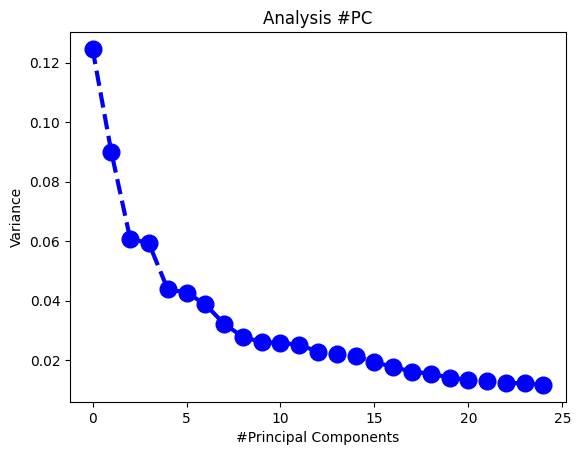

In [87]:
explained_variance
num_pc= range(25);

#Visualize 2D Projection
import matplotlib.pyplot as plt

#plt.plot(num_pc, explained_variance)
plt.style.use('default')
plt.plot(num_pc, explained_variance, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('Analysis #PC')
plt.xlabel('#Principal Components')
plt.ylabel('Variance')

plt.show()

In [88]:
#Training and Making Predictions
#In this case we'll use random forest classification for making the predictions.
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Resultado Aplicacion PCA

In [89]:
#EVALUACION
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))  

[[705   0]
 [ 30   0]]
accuracy: 0.9591836734693877


# RED NEURONAL (NN) 


In [90]:
#Importación de librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
print('importadas')

importadas


### Normalización

In [91]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


### Split en train y test.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

### Construcción del modelo de la arquitectura de la red neuronal

In [93]:
model = Sequential()
model.add(Dense(16, input_dim=85, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                1376      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 1,787
Trainable params: 1,787
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Las funciones de costo o pérdida son: mean_squared_error (mse) y mean_absolute_error (mae)
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

### Training y Validation

In [95]:
#50 epochs: 50 pasos de forward y backward
#Se muestra: training loss y validation loss
history = model.fit(X_train, y_train, epochs=50, batch_size=8,  verbose=1, validation_split=0.2)

Epoch 1/50
276/276 [==============================] - 1s 3ms/step - loss: 0.0372 - mse: 0.0372 - mae: 0.0767 - val_loss: 0.0348 - val_mse: 0.0348 - val_mae: 0.0659
Epoch 2/50
276/276 [==============================] - 0s 2ms/step - loss: 0.0353 - mse: 0.0353 - mae: 0.0698 - val_loss: 0.0358 - val_mse: 0.0358 - val_mae: 0.1050
Epoch 3/50
276/276 [==============================] - 0s 2ms/step - loss: 0.0349 - mse: 0.0349 - mae: 0.0711 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.0557
Epoch 4/50
276/276 [==============================] - 0s 2ms/step - loss: 0.0347 - mse: 0.0347 - mae: 0.0713 - val_loss: 0.0332 - val_mse: 0.0332 - val_mae: 0.0803
Epoch 5/50
276/276 [==============================] - 0s 2ms/step - loss: 0.0338 - mse: 0.0338 - mae: 0.0721 - val_loss: 0.0324 - val_mse: 0.0324 - val_mae: 0.0818
Epoch 6/50
276/276 [==============================] - 0s 2ms/step - loss: 0.0328 - mse: 0.0328 - mae: 0.0762 - val_loss: 0.0320 - val_mse: 0.0320 - val_mae: 0.0617
Epoch 7/50
276/2

### Visualización de accuracy

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


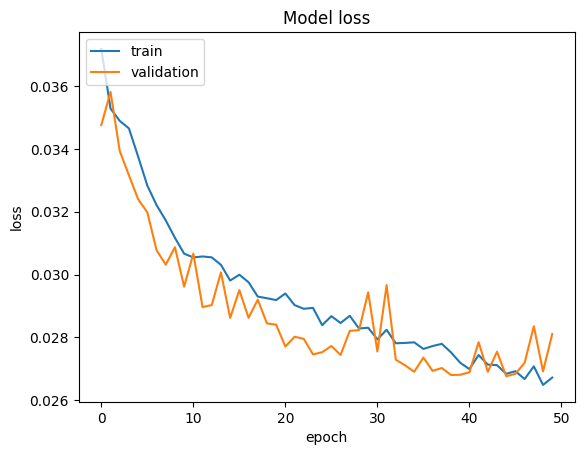

In [98]:
print(history.history.keys())
# "Loss"

plt.plot(history.history['loss'],  markersize=12)
plt.plot(history.history['val_loss'], markersize=11)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.style.use('default')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("Modelo")
plt.show()

##MODELOS PARA SVM

### SVM Polinomial

In [ ]:
from sklearn.svm import SVC
#funcion para C
Cpoly=[0.1,100,500,10000]


def VSMPoly (Cpoly):
    contador= 0
    POLY=[]
    for c in Cpoly: 
        contador=contador+1;
        print("Se ejecuta el entrenamiento numero ",contador)
        classifier = SVC(gamma='auto', kernel='poly', C=c, random_state = 0, verbose=True)
        classifier.fit(X_train,y_train)
        #Predicciones del conjunto de Test
        y_pred = classifier.predict(X_test)
        model_acc = classifier.score(X_test, y_test)
        test_acc_svm = accuracy_score(y_test, y_pred) #accuracy_score hace lo mismo que la función score 
        acc_svm=str(round(test_acc_svm, 4))
        print('\nSVM Accuracy con classifier.score: ', str(round(model_acc, 4)))
        print('\nSVM Accuracy con accuracy_score: ', acc_svm)
        from sklearn.metrics import zero_one_loss
        error_rate_svm = zero_one_loss(y_test,y_pred)
        error_rate_svm=str(round(error_rate_svm, 4))
        print("Error rate (%): ",error_rate_svm)
        POLY.append([c,float(acc_svm),float(error_rate_svm)])
        
    return POLY


ResultadoPoly=VSMPoly(Cpoly);
it=0;
vec=[]
vecRes=[]
for i in ResultadoPoly:
    print(i)
    vec.append(ResultadoPoly[it][1]);
    it=it+1
max= np.amax(vec)
vecRes.append(max)


Se ejecuta el entrenamiento numero  1
[LibSVM]
SVM Accuracy con classifier.score:  0.9749

SVM Accuracy con accuracy_score:  0.9749
Error rate (%):  0.0251
Se ejecuta el entrenamiento numero  2
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Accuracy con classifier.score:  0.9749

SVM Accuracy con accuracy_score:  0.9749
Error rate (%):  0.0251
Se ejecuta el entrenamiento numero  3
[LibSVM]
SVM Accuracy con classifier.score:  0.9749

SVM Accuracy con accuracy_score:  0.9749
Error rate (%):  0.0251
Se ejecuta el entrenamiento numero  4
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Accuracy con classifier.score:  0.9739

SVM Accuracy con accuracy_score:  0.9739
Error rate (%):  0.0261
[0.1, 0.9749, 0.0251]
[100, 0.9749, 0.0251]
[500, 0.9749, 0.0251]
[10000, 0.9739, 0.0261]


### SVM Lineal

In [ ]:
CLinear=[0.1,100,500,10000]


def VSMLinear (CLinear):
    contador= 0
    POLY=[]
    for c in CLinear: 
        contador=contador+1;
        print("Se ejecuta el entrenamiento numero ",contador)
        classifier = SVC(gamma='auto', kernel='linear',C=c, verbose=True)
        classifier.fit(X_train,y_train)
        #Predicciones del conjunto de Test
        y_pred = classifier.predict(X_test)
        model_acc = classifier.score(X_test, y_test)
        test_acc_svm = accuracy_score(y_test, y_pred) #accuracy_score hace lo mismo que la función score 
        acc_svm=str(round(test_acc_svm, 4))
        print('\nSVM Accuracy con classifier.score: ', str(round(model_acc, 4)))
        print('\nSVM Accuracy con accuracy_score: ', acc_svm)
        from sklearn.metrics import zero_one_loss
        error_rate_svm = zero_one_loss(y_test,y_pred)
        error_rate_svm=str(round(error_rate_svm, 4))
        print("Error rate (%): ",error_rate_svm)
        POLY.append([c,float(acc_svm),float(error_rate_svm)])
        
    return POLY

ResultadoLinear=VSMLinear(CLinear);
it=0;
vec=[]
for i in ResultadoLinear:
    print(i)
    vec.append(ResultadoLinear[it][1]);
    it=it+1
max= np.amax(vec)
vecRes.append(max)

Se ejecuta el entrenamiento numero  1
[LibSVM]
SVM Accuracy con classifier.score:  0.9749

SVM Accuracy con accuracy_score:  0.9749
Error rate (%):  0.0251
Se ejecuta el entrenamiento numero  2
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Accuracy con classifier.score:  0.976

SVM Accuracy con accuracy_score:  0.976
Error rate (%):  0.024
Se ejecuta el entrenamiento numero  3
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Accuracy con classifier.score:  0.976

SVM Accuracy con accuracy_score:  0.976
Error rate (%):  0.024
Se ejecuta el entrenamiento numero  4
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Accuracy con classifier.score:  0.976

SVM Accuracy con accuracy_score:  0.976
Error rate (%):  0.024
[0.1, 0.9749, 0.0251]
[100, 0.976, 0.024]
[500, 0.976, 0.024]
[10000, 0.976, 0.024]


### SVM Sigmoide

In [ ]:
Csigmoid=[0.1,100,500,10000]


def VSMsigmoid (Csigmoid):
    contador= 0
    POLY=[]
    for c in Csigmoid: 
        contador=contador+1;
        print("Se ejecuta el entrenamiento numero ",contador)
        classifier= SVC(gamma='auto', kernel='sigmoid',C=c, random_state = 0, verbose=True)
        classifier.fit(X_train,y_train)
        #Predicciones del conjunto de Test
        y_pred = classifier.predict(X_test)
        model_acc = classifier.score(X_test, y_test)
        test_acc_svm = accuracy_score(y_test, y_pred) #accuracy_score hace lo mismo que la función score 
        acc_svm=str(round(test_acc_svm, 4))
        print('\nSVM Accuracy con classifier.score: ', str(round(model_acc, 4)))
        print('\nSVM Accuracy con accuracy_score: ', acc_svm)
        from sklearn.metrics import zero_one_loss
        error_rate_svm = zero_one_loss(y_test,y_pred)
        error_rate_svm=str(round(error_rate_svm, 4))
        print("Error rate (%): ",error_rate_svm)
        POLY.append([c,float(acc_svm),float(error_rate_svm)])
        
    return POLY

Resultadosigmoid=VSMsigmoid(Csigmoid);
vec=[]
it=0
for i in Resultadosigmoid:
    print(i)
    vec.append(Resultadosigmoid[it][1]);
    it=it+1
max= np.amax(vec)
vecRes.append(max)
print('Vector con los mejores datos')
vecRes

Se ejecuta el entrenamiento numero  1
[LibSVM]
SVM Accuracy con classifier.score:  0.9749

SVM Accuracy con accuracy_score:  0.9749
Error rate (%):  0.0251
Se ejecuta el entrenamiento numero  2
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Accuracy con classifier.score:  0.9749

SVM Accuracy con accuracy_score:  0.9749
Error rate (%):  0.0251
Se ejecuta el entrenamiento numero  3
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Accuracy con classifier.score:  0.9749

SVM Accuracy con accuracy_score:  0.9749
Error rate (%):  0.0251
Se ejecuta el entrenamiento numero  4
[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Accuracy con classifier.score:  0.9575

SVM Accuracy con accuracy_score:  0.9575
Error rate (%):  0.0425
[0.1, 0.9749, 0.0251]
[100, 0.9749, 0.0251]
[500, 0.9749, 0.0251]
[10000, 0.9575, 0.0425]
Vector con los mejores datos


[0.9749, 0.976, 0.9749]

In [ ]:
import pandas as pd
Tipo = ["SVMPOLY"] * 4+["SVMLINEAR"] * 4+["SVMSIGMOID"] * 4 
Regulacion = ResultadoPoly[0][0],ResultadoPoly[1][0],ResultadoPoly[2][0],ResultadoPoly[3][0],ResultadoLinear[0][0],ResultadoLinear[1][0],ResultadoLinear[2][0],ResultadoLinear[3][0],Resultadosigmoid[0][0],Resultadosigmoid[1][0],Resultadosigmoid[2][0],Resultadosigmoid[3][0],
accuracy = ResultadoPoly[0][1],ResultadoPoly[1][1],ResultadoPoly[2][1],ResultadoPoly[3][1],ResultadoLinear[0][1],ResultadoLinear[1][1],ResultadoLinear[2][1],ResultadoLinear[3][1],Resultadosigmoid[0][1],Resultadosigmoid[1][1],Resultadosigmoid[2][1],Resultadosigmoid[3][1],
TasaError = ResultadoPoly[0][2],ResultadoPoly[1][2],ResultadoPoly[2][2],ResultadoPoly[3][2],ResultadoLinear[0][2],ResultadoLinear[1][2],ResultadoLinear[2][2],ResultadoLinear[3][2],Resultadosigmoid[0][2],Resultadosigmoid[1][2],Resultadosigmoid[2][2],Resultadosigmoid[3][2],
df = pd.DataFrame({"Tipo": Tipo, "Regulacion": Regulacion, "accuracy": accuracy, "TasaError":TasaError})

In [ ]:
df.head(12)
df.to_csv('dataframe.csv',sep=';')

### RESULTADOS MODELOS SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline 
dirResultados="/content/dataframe.csv"
dataResultados=pd.read_csv(dirResultados,sep=';')
dataResultados.head(12)
#print (dataResultados.dtypes)

,Unnamed: 0,Tipo,Regulacion,accuracy,TasaError
0,0,SVMPOLY,0.1,0.9749,0.0251
1,1,SVMPOLY,100.0,0.9749,0.0251
2,2,SVMPOLY,500.0,0.9749,0.0251
3,3,SVMPOLY,10000.0,0.9739,0.0261
4,4,SVMLINEAR,0.1,0.9749,0.0251
5,5,SVMLINEAR,100.0,0.9760,0.0240
6,6,SVMLINEAR,500.0,0.9760,0.0240
7,7,SVMLINEAR,10000.0,0.9760,0.0240
8,8,SVMSIGMOID,0.1,0.9749,0.0251
9,9,SVMSIGMOID,100.0,0.9749,0.0251


In [ ]:
ResultadosPorTecnica=dataResultados.groupby(['Tipo','Regulacion']).mean()
print(ResultadosPorTecnica)
ResultadosPorTecnica=ResultadosPorTecnica.groupby(['Tipo'])

                       Unnamed: 0  accuracy  TasaError
Tipo       Regulacion                                 
SVMLINEAR  0.1                  4    0.9749     0.0251
           100.0                5    0.9760     0.0240
           500.0                6    0.9760     0.0240
           10000.0              7    0.9760     0.0240
SVMPOLY    0.1                  0    0.9749     0.0251
           100.0                1    0.9749     0.0251
           500.0                2    0.9749     0.0251
           10000.0              3    0.9739     0.0261
SVMSIGMOID 0.1                  8    0.9749     0.0251
           100.0                9    0.9749     0.0251
           500.0               10    0.9749     0.0251
           10000.0             11    0.9575     0.0425


In [ ]:

print('Mejores Resultados SMV \n',vecRes)



Mejores Resultados SMV 
 [0.9749, 0.976, 0.9749]
